# Xeryon: Python Library
A quick overview of the Xeryon python library.

## 1. Setup
Note: the Xeryon.py file needs to be within the same folder.<br>
Note: <a href="https://pypi.org/project/pyserial/">pyserial</a> library is required. "pip install pyserial" (! This is different from "pip install serial") <br>
The code below initializes the system.

In [8]:
from Xeryon import *
controller  = Xeryon("/dev/ttyACM2", 115200)           # Setup serial communication
axisX       = controller.addAxis(Stage.XRTU_30_109, "X") # Add all axis and specify the correct stage.
# This step above differs a bit from our instruction video.
# Now you have to specifiy the axis-letter in the construction.
# You can find your axis lettters in your config.txt files.

In [6]:
axisX.reset()
controller.stop()

Program stopped running.


In [5]:
import time 
from pylablib.devices import Ophir
vega = Ophir.VegaPowerMeter(("/dev/ttyUSB3", 9600))
vega.get_power()

for i in range(20):
    print(vega.get_power())
    time.sleep(3)

1e-05
2e-05


KeyboardInterrupt: 

In [6]:
vega.close()

### Now the system can be started. <br>
In closed loop: first run axis_.findIndex() so the stage can find its index.

In [9]:
controller.start()
axisX.findIndex()
# For multiaxis systems, it's possible to do this in a loop:
# for axis in controller.getAllAxis():
#    axis.findIndex()

Searching index for axis X.
Index of axis X found.


In [38]:

print(axisX.getSetting('SSPD'))

None


# 2. Basic Control
This includes the functions: setDPOS(), getDPOS(), getEPOS(), step(), setUnits() <br>
DPOS stands for 'Desired POSition', this is the position that the stage trys to reach. <br>
EPOS stands for 'Encoder POSition', this value indicates the actual position of the stage.<br>

In [49]:
axisX.setUnits(Units.mu)
axisX.setDPOS(100)
#axisX.setDPOS(5)

DPOS: 100 mu and EPOS: 99.92009967667536 mu


In [4]:
from time import sleep
axisX.setUnits(Units.deg)
axisX.setDPOS(101.1)
sleep(1)

DPOS: 101.1 degrees and EPOS: 101.09375 degrees


Exception in thread Thread-5 (__processData):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/home/eugene/Documents/Python-Matlab-Library-main/Xeryon.py", line 1164, in __processData
    while self.ser.in_waiting > 0 and max_to_read >0:  # While there is data to read
  File "/home/eugene/.local/lib/python3.10/site-packages/serial/serialposix.py", line 549, in in_waiting
    s = fcntl.ioctl(self.fd, TIOCINQ, TIOCM_zero_str)
OSError: [Errno 5] Input/output error


In [ ]:
print(axisX.getDPOS())
print(axisX.getEPOS())

In [ ]:
axisX.setUnits(Units.mm)

In [13]:
axisX.setDPOS(0.1)

KeyboardInterrupt: 

In [18]:
axisX.setUnits(Units.deg)
axisX.setDPOS(93.0)

DPOS: 93.0 degrees and EPOS: 92.99375 degrees


In [35]:
import numpy as np 
from time import sleep


import rigol2000a

osc = rigol2000a.Rigol2072a()

# Change voltage range of channel 1 to 50mV/div.
osc[2].set_vertical_scale_V(0.02)
angles = [
118.95
, 118.80
, 118.5
, 118.35
, 118.2
, 117.95
, 117.65
, 117.45
, 117.3
, 117.15
, 116.85
, 116.6
, 116.4
, 116.3
, 116.15
, 115.9
, 115.6
, 115.4
, 115.25
, 114.9
, 114.65
, 114.5
, 114.3
, 113.95
, 113.65
, 113.5
, 113.1
, 112.9
, 112.65
, 112.3
, 112.1
, 111.8
, 111.55
, 111.3
, 111
, 110.85
, 110.75
, 110.5
, 110.25
, 110.05
, 109.8
, 109.55
, 109.3
, 109.1
, 108.95
, 108.8
, 108.65
, 108.45
, 108.2
, 108
, 107.8
, 107.55
, 107.35
, 107.15
, 106.95
, 106.75
, 106.55
, 106.35
, 106.1
, 105.95
, 105.75
, 105.55
, 105.35
, 105.2
, 105
, 104.85
, 104.6
, 104.45
, 104.3
, 104.05
, 103.9
, 103.7
, 103.55
, 103.35
, 103.2
, 102.85
, 102.7
, 102.55
, 102.35
, 102.15
, 102.05
, 101.8
, 101.55
, 101.35
, 101.25
, 101.1
, 100.9
, 100.8
, 100.6
, 100.4
, 100.15
, 100
, 99.75
, 99.65
, 99.55
, 99.35
, 99.25
, 99.1
, 98.85
, 98.65
, 98.5
, 98.3
, 98.2
, 98.1
, 97.9
, 97.8
, 97.65
, 97.4
, 97.25
, 97
, 96.45
, 96.6
, 96.2
, 95.95
, 95.85
, 95.65
, 95.5
, 95.4
, 95.25
, 95.2
, 95.05
, 94.95
, 94.55
, 94.8
, 94.7
, 94.25
, 94.5
, 94.4
, 93.9
, 94.15
, 94.05
, 93.85
, 93.75
, 93.7
, 93.55
, 93.45
, 93.35
, 93.25
, 93.15
, 93 ]

wave_numbers =  [
   784,
785,
786,
787,
788,
788,
789,
790,
791,
792,
793,
794,
795,
796,
797,
798,
799,
801,
802,
803,
804,
806,
807,
808,
811,
812,
813,
815,
816,
817,
820,
821,
822,
825,
826,
827,
829,
830,
831,
834,
835,
836,
839,
840,
841,
842,
843,
844,
847,
848,
849,
852,
853,
854,
857,
858,
859,
862,
863,
866,
867,
868,
870,
871,
872,
875,
876,
877,
880,
881,
884,
885,
886,
889,
890,
895,
896,
898,
899,
902,
903,
904,
908,
909,
912,
913,
914,
917,
918,
922,
923,
926,
927,
930,
931,
932,
935,
936,
940,
941,
945,
946,
949,
950,
951,
953,
954,
958,
959,
963,
964,
968,
973,
977,
978,
981,
982,
985,
986,
987,
990,
991,
992,
994,
995,
996,
999,
1000,
1001,
1004,
1005,
1008,
1009,
1010,
1013,
1014,
1017,
1018,
1019,
1023, 
]

axisX.startLogging()
power = []
epos = []
axisX.setUnits(Units.deg)
axisX.setDPOS(118.95)
is_goog_angle = 0
cur_ang = float(axisX.getDPOS())


for i in range(0, 30):    
    

    print("cur_ang ", cur_ang)
    for j in range (0, len(angles)):
        if round(cur_ang, 2) == round(angles[j], 2):
            print("angles[j] ", angles[j])
            is_good_angle = 1
            break
        else:
            is_good_angle = 0
            
    if is_good_angle == 1:
        axisX.setDPOS(cur_ang)
        vpp = float(osc[2].get_vpp())
        power.append(vpp * float(1000))
        epos.append(axisX.getEPOS())
        time.sleep(0.5)

    cur_ang -= 0.05
    cur_ang = round(cur_ang, 2)
    print(cur_ang)

        
logs = axisX.endLogging()

DPOS: 118.95 degrees and EPOS: 118.94375 degrees
cur_ang  118.95
angles[j]  118.95
DPOS: 118.95 degrees and EPOS: 118.94375 degrees
118.9
cur_ang  118.9
118.85
cur_ang  118.85
118.8
cur_ang  118.8
angles[j]  118.8
DPOS: 118.8 degrees and EPOS: 118.8125 degrees
118.75
cur_ang  118.75
118.7
cur_ang  118.7
118.65
cur_ang  118.65
118.6
cur_ang  118.6
118.55
cur_ang  118.55
118.5
cur_ang  118.5
angles[j]  118.5
DPOS: 118.5 degrees and EPOS: 118.5125 degrees
118.45
cur_ang  118.45
118.4
cur_ang  118.4
118.35
cur_ang  118.35
angles[j]  118.35
DPOS: 118.35 degrees and EPOS: 118.35625 degrees
118.3
cur_ang  118.3
118.25
cur_ang  118.25
118.2
cur_ang  118.2
angles[j]  118.2
DPOS: 118.2 degrees and EPOS: 118.20625 degrees
118.15
cur_ang  118.15
118.1
cur_ang  118.1
118.05
cur_ang  118.05
118.0
cur_ang  118.0
117.95
cur_ang  117.95
angles[j]  117.95
DPOS: 117.95 degrees and EPOS: 117.95625 degrees
117.9
cur_ang  117.9
117.85
cur_ang  117.85
117.8
cur_ang  117.8
117.75
cur_ang  117.75
117.7
cur_ang

Exception in thread Thread-8 (__processData):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/home/eugene/Documents/Python-Matlab-Library-main/Xeryon.py", line 1164, in __processData
    while self.ser.in_waiting > 0 and max_to_read >0:  # While there is data to read
  File "/home/eugene/.local/lib/python3.10/site-packages/serial/serialposix.py", line 549, in in_waiting
    s = fcntl.ioctl(self.fd, TIOCINQ, TIOCM_zero_str)
OSError: [Errno 5] Input/output error


## 3. Speed control and scanning
Scanning: continiously move with fixed speed

In [ ]:
axisX.stopScan()
axisX.setDPOS(0)      # Notice that the speed is still 1 mm/s.

In [105]:
axisX.startScan(1, 2)  # It is also possible to scan for a certain amount of seconds.

## 4. Getting data back from the controller
The status bits: (defined in the datasheet)

In [106]:
axisX.isForceZero()
axisX.isMotorOn()
axisX.isClosedLoop()
axisX.isEncoderAtIndex()
axisX.isEncoderValid()
axisX.isSearchingIndex()
axisX.isPositionReached()
axisX.isEncoderError()
axisX.isScanning()
axisX.isAtLeftEnd()
axisX.isAtRightEnd()
axisX.isErrorLimit()
axisX.isSearchingOptimalFrequency()

False

It is also possible to log all incoming data.<br>
The function endLogging() returns a dictionary of the format: <br>
    { "EPOS": [..,..,..], <br>
      "DPOS": [..,..,..],<br>
      "STAT": [..,..,..],<br>
    ...}<br>   

25.6
25.6
25.6
25.6
24.8
24.8
24.8
24.8
25.6
25.6
25.6
24.8
24.0
25.6
24.8
25.6
24.0
24.0
23.2
24.0
23.2
24.8
24.8
25.6
24.8
24.8
24.8
23.2
24.8
24.8
24.0
26.4
24.8
24.0
24.8
24.8
28.0
24.8
24.8
25.6
25.6
25.6
28.8
27.2
27.2
27.2
31.2
30.4
33.6
34.4
36.0
31.2
32.0
40.800000000000004
36.0
38.4
36.8
42.4
43.2
39.199999999999996
39.199999999999996
44.0
44.8
43.2
41.6
43.2
44.0
44.0
38.4
44.0
44.8
51.2
40.800000000000004
42.4
46.4
50.4
53.6
57.6
56.0
60.8
65.60000000000001
67.2
70.4
72.0
76.00001
80.0
72.0
74.39999999999999
76.8
76.0
72.0
76.0
71.2
70.4
68.8
67.2
67.2
68.0
64.8
62.4
65.60000000000001
63.2
64.8
61.6
61.6
70.4
59.2
52.8
56.800000000000004
53.6
57.6
56.800000000000004
51.2
54.4
56.0
53.6
50.4
50.4
45.6
43.2
42.4
40.0
38.4
37.6
37.6
33.6
32.0
31.2
29.6
32.800000000000004
24.0
28.8
25.6
30.4
26.4
27.2
24.0
24.8
25.6
24.8
EPOS:
118.94375
118.8125
118.5125
118.35625
118.20625
117.95
117.65
117.45625
117.3
117.15
116.84375
116.60625
116.40625
116.30625
116.15625
115.90625
115.6
11

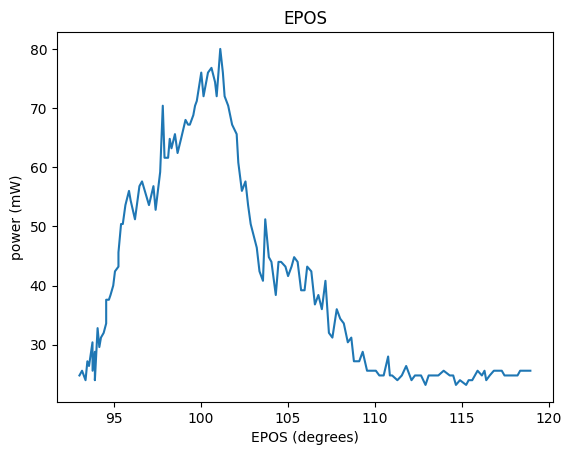

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
# unit_converted_epos = []
# for index in range(0, len(logs["EPOS"])):
#     unit_converted_epos.append(axisX.convertEncoderUnitsToUnits(logs["EPOS"][index], axisX.units))

for i in range(0, len(power)):
    print(power[i])

print("EPOS:")
for i in range(0, len(epos)):
    print(epos[i])

print("Wave numbers:")
for i in range(0, len(wave_numbers)):
    print(wave_numbers[i])
    
# x = epos
x = wave_numbers
y = power
plt.plot(x,y)

plt.ylabel("power (mW)" )
plt.xlabel('EPOS ('+str(axisX.units)+')')
plt.title("EPOS")
plt.show()

In [8]:
controller.stop()

Program stopped running.
